<a href="https://colab.research.google.com/github/younglaecho/learn_machine_learning/blob/main/chap02_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

import numpy as np

fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


np.column_stack()은 두개의 리스트를 같은 인덱스 끼리 묶어 연결한다. 

In [11]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


sklearn.model_selection.train_test_split()은 훈련셋과 테스트셋을 만들어주는 메서드이다.
random_state라는 매개변수를 통해 랜덤시드를 정할 수 있고,
stratyfy에 타겟 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눌 수 있다.

In [12]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)
print(test_target)

(36, 2) (13, 2)
(36,) (13,)
[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [13]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


아래의 예시를 보면 사람이 보기에는 도미데이터인게 확실하나, KNeighborsClassifier는 빙어라고 예측했다. 문제는 무엇일까?

In [14]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)
print(kn.predict([[25,150]]))

[0.]


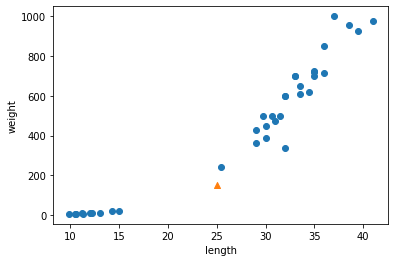

In [15]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

문제를 찾기위해 KNeighborsClassifier의 기준이 되는 이웃값의 디폴트 값인 5개의 값을 찾아보겠습니다.

In [22]:
distances, indexes = kn.kneighbors([[25,150]])
print(distance, indexes)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]] [[21 33 19 30  1]]


아래의 그림과 distance 출력값을 보면 이상한 점을 찾을 수 있습니다.<br>
예측하고자 하는 지점의 값인 세모로 부터 위에 있는 마름모까지의 거리가 92인데,<br>
빙어 케이스에 있는 가장오른쪽값 까지의 거리가 130 밖에 되지 않습니다.<br>


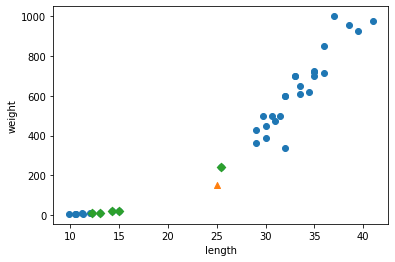

In [17]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker="^")
plt.scatter(train_input[indexes, 0 ], train_input[indexes,1], marker="D")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [23]:
print(train_input[indexes])
print(train_target[indexes])
print(distances)

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]
[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


위의 문제는 x축과 y축의 스케일이 서로 크게 차이나기 때문에 발생한 것입니다.<br>
이 문제를 해결하여 다시 그래프를 그려보겠습니다.<br>
plt.xlim, plt.ylim 을 이용하여 축을 스케일을 조정할 수 있습니다.

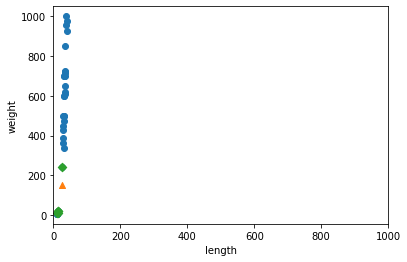

In [24]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker="^")
plt.scatter(train_input[indexes, 0 ], train_input[indexes,1], marker="D")
plt.xlim(0,1000)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

길이와 무게는 데이터를 표현하는 기준이 다르기 때문에 이대로라면 올바르게 예측할 수 없습니다.<br>
특성값들은 적절한 기준에 맞추어주는 과정이 필요합니다. 이를 **데이터 전처리**라고 합니다.<br>


가장 널리 사용하는 전처리 방법 중 하나는 **표준점수** 입니다. <br>
표준점수 : 특성값이 표준편차의 몇 배만큼 떨어져 있는지를 나타냄.<br>
표준점수 = (특성값 - 평균값)/표준편차

In [26]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

print(mean, std)

train_scaled = (train_input-mean) / std

print(train_scaled)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]
[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]
 [ 0.97198434  1.68853872]
 [-1.61255346 -1.3742613 ]
 [ 0.72154463  0.51315596]
 [-1.53241275 -1.3742613 ]
 [ 0.17057727 -0.28177396]
 [ 0.5712808   0.76060496]
 [ 0.34087627  0.14198246]
 [ 1.12224816  1.54934866]
 [ 0.62136874  0.60594934]
 [-1.30200822 -1.34363949]
 [ 0.42101698  0.14198246]
 [-0.19005591 -0.65604058]
 [-1.75279969 -1.38384995]
 [ 0.47110492  0.45129371]
 [-1.68267658 -1.38137546]
 [ 0.62136874  0.48222484]
 [-1.67265899 -1.38292202]
 [ 0.77163257  0.76060496]
 [ 0.47110492  0.45129371]
 [ 0.77163257  0.83793278]
 [-1.43223687 -1.36683783]
 [ 0.27075315 -0.01267317]
 [ 0.47110492 -0.35291555]
 [-1.2318851  -1.34302087]
 [ 0.27075315 -0.19825992]

표준점수를 통해 새롭게 그래프를 그려보겠습니다.

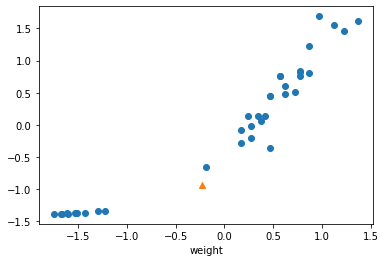

In [28]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.xlabel('weight')
plt.show()

위의 그래프를 보면 길이와 무게 값이 모두 -1.5와 1.5 사이에 위치하도록 표준화 되어있는 것을 볼 수 있습니다.<br>
이제 표준점수를 가지고 학습시켜보도록 하겠습니다.

In [29]:
kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean) /std

위의 코드에서 중요한 점은 테스트셋에 표준점수를 적용할 때에도 훈련셋의 평균값과 표준점수를 사용해야한다는 것입니다.<br>
아래에서 이제 25,150 데이터의 값을 도미데이터로 정확히 예측하는 것으로 확인할 수 있습니다.

In [30]:
print(kn.score(test_scaled, test_target))
print(kn.predict([new]))

1.0
[1.]


해당위치에서 가장 근접한 값을 우리가 의도한대로 잘 접근하고 있는 것을 확인할 수 있습니다.

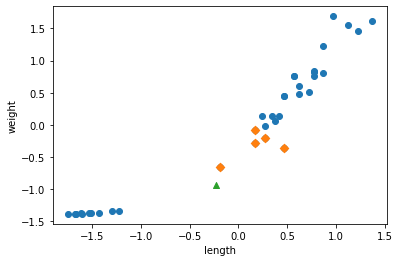

In [32]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1], marker='D')
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()